In [1]:
import tensorflow as tf

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [4]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
# reshape and rescale data for the CNN
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
train_images, test_images = train_images/255, test_images/255

In [105]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [106]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_images)

In [107]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [108]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 128)       36992     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 5, 5, 256)        

In [110]:
tensor_board = tf.keras.callbacks.TensorBoard('C:/Users/Faycal/projects/tf-gpu-MNIST2/logs/LeNet-MNIST-1')

In [111]:
epochs = 50 
batch_size = 128

In [112]:
import time

start_time=time.time()
history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=batch_size),
                              epochs = epochs, validation_data = (test_images, test_labels),
                              verbose = 2, steps_per_epoch=1000,callbacks=[tensor_board])

print('Training took {} seconds'.format(time.time()-start_time))

Epoch 1/50
1000/1000 - 18s - loss: 0.3231 - acc: 0.8974 - val_loss: 0.0429 - val_acc: 0.9883
Epoch 2/50
1000/1000 - 17s - loss: 0.1110 - acc: 0.9676 - val_loss: 0.0290 - val_acc: 0.9907
Epoch 3/50
1000/1000 - 17s - loss: 0.0865 - acc: 0.9747 - val_loss: 0.0222 - val_acc: 0.9934
Epoch 4/50
1000/1000 - 17s - loss: 0.0739 - acc: 0.9789 - val_loss: 0.0216 - val_acc: 0.9936
Epoch 5/50
1000/1000 - 17s - loss: 0.0641 - acc: 0.9811 - val_loss: 0.0180 - val_acc: 0.9944
Epoch 6/50
1000/1000 - 17s - loss: 0.0617 - acc: 0.9819 - val_loss: 0.0198 - val_acc: 0.9935
Epoch 7/50
1000/1000 - 17s - loss: 0.0551 - acc: 0.9838 - val_loss: 0.0197 - val_acc: 0.9940
Epoch 8/50
1000/1000 - 17s - loss: 0.0510 - acc: 0.9853 - val_loss: 0.0172 - val_acc: 0.9951
Epoch 9/50
1000/1000 - 17s - loss: 0.0499 - acc: 0.9857 - val_loss: 0.0169 - val_acc: 0.9948
Epoch 10/50
1000/1000 - 17s - loss: 0.0461 - acc: 0.9867 - val_loss: 0.0182 - val_acc: 0.9942
Epoch 11/50
1000/1000 - 17s - loss: 0.0424 - acc: 0.9874 - val_loss: 

In [113]:
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os

In [114]:
def load_images_to_data(image_label, image_directory, features_data, label_data):
    list_of_files = os.listdir(image_directory)
    for file in list_of_files:
        image_file_name = os.path.join(image_directory, file)
        if ".png" in image_file_name:
            img = Image.open(image_file_name).convert("L")
            img = np.resize(img, (28,28,1))
            im2arr = np.array(img)
            im2arr = im2arr.reshape(1,28,28,1)
            features_data = np.append(features_data, im2arr, axis=0)
            label_data = np.append(label_data, [image_label], axis=0)
    return features_data, label_data

In [115]:
img = Image.open('C:\\Users\\Faycal\\Downloads\\stock-photo-house-number_seven.JPG').convert("L")
img = np.resize(img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)

In [116]:
y_pred = model.predict_classes(im2arr)
print(y_pred)

[8]


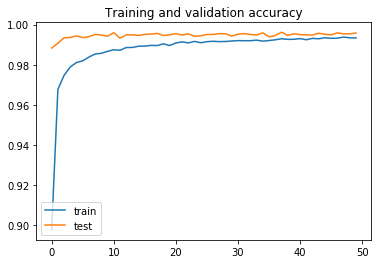

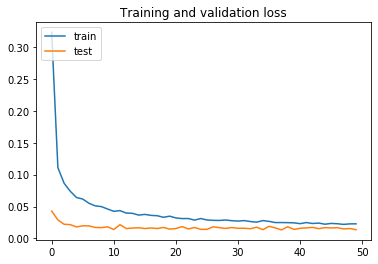

In [127]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.legend(['train', 'test'], loc='lower left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.legend(['train', 'test'], loc='upper left')

# Visualizing the Convolutions and Pooling

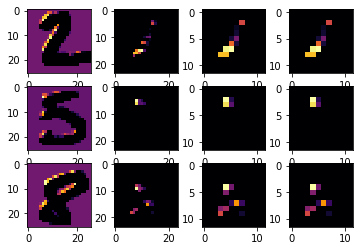

In [119]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=15
THIRD_IMAGE=260
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

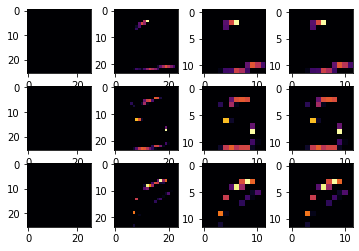

In [120]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=15
THIRD_IMAGE=260
CONVOLUTION_NUMBER = 2
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Automatically created module for IPython interactive environment
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg     

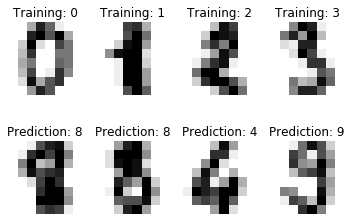

In [121]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [126]:
activations = activation_model.predict(img)

C:\Users\Faycal\Anaconda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


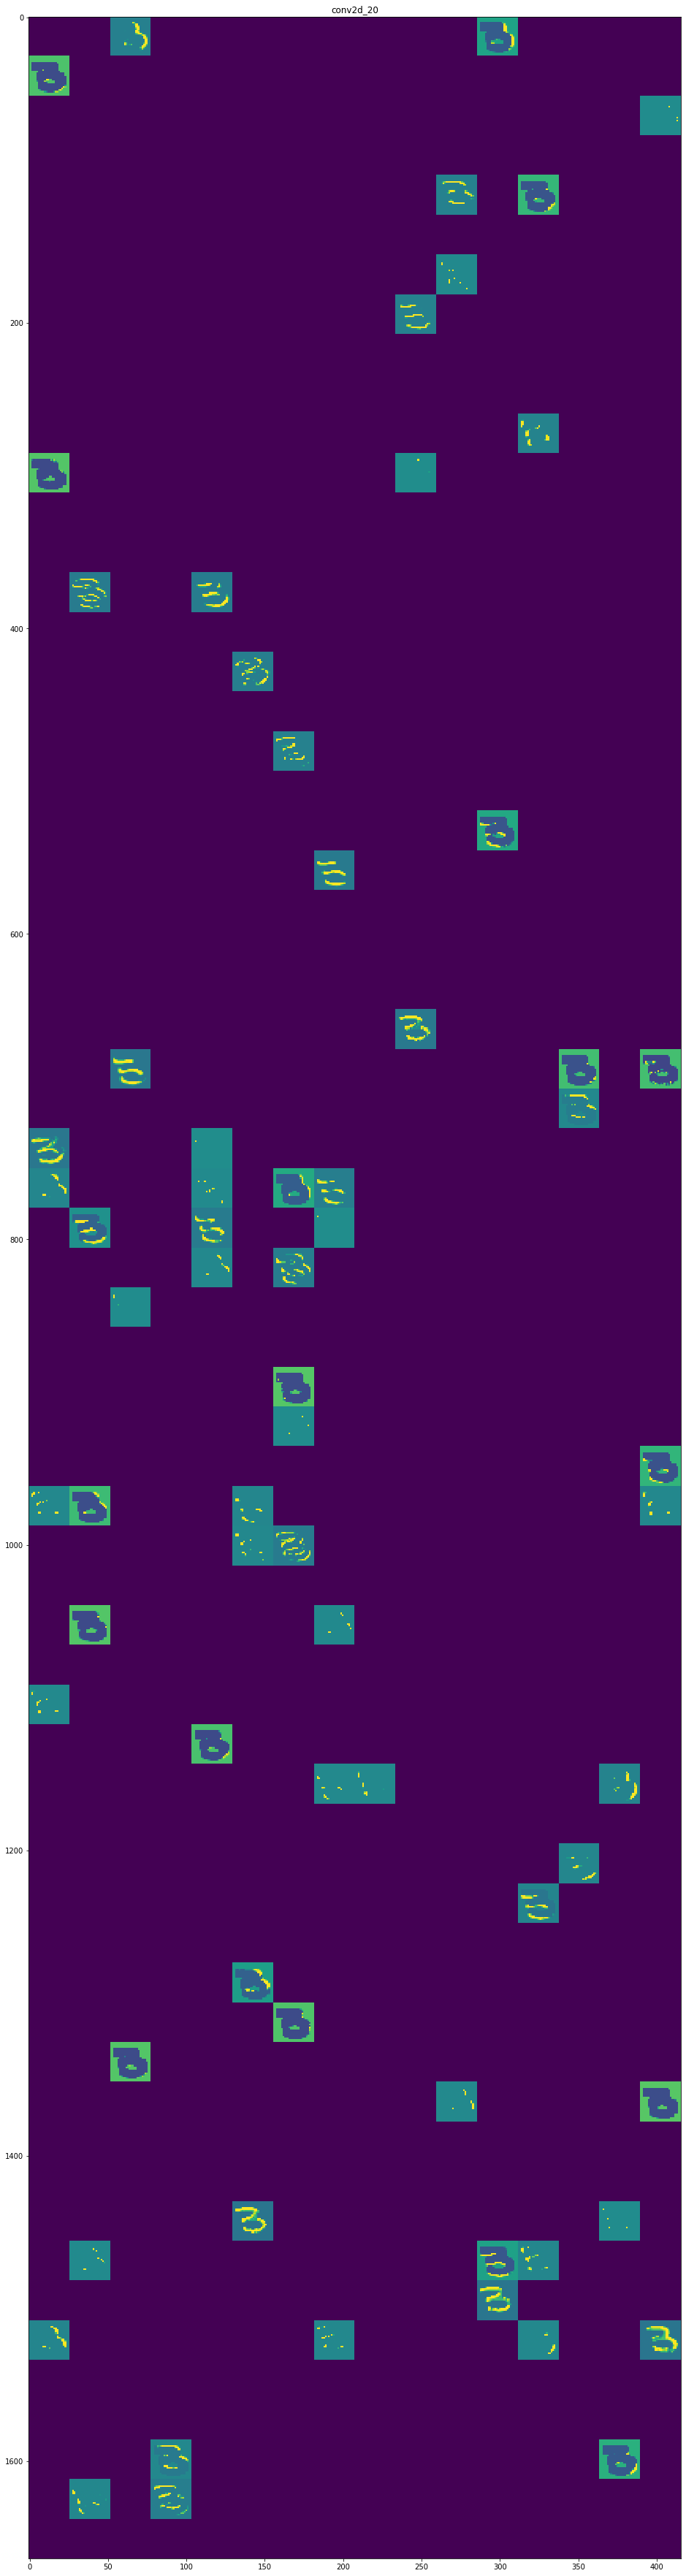

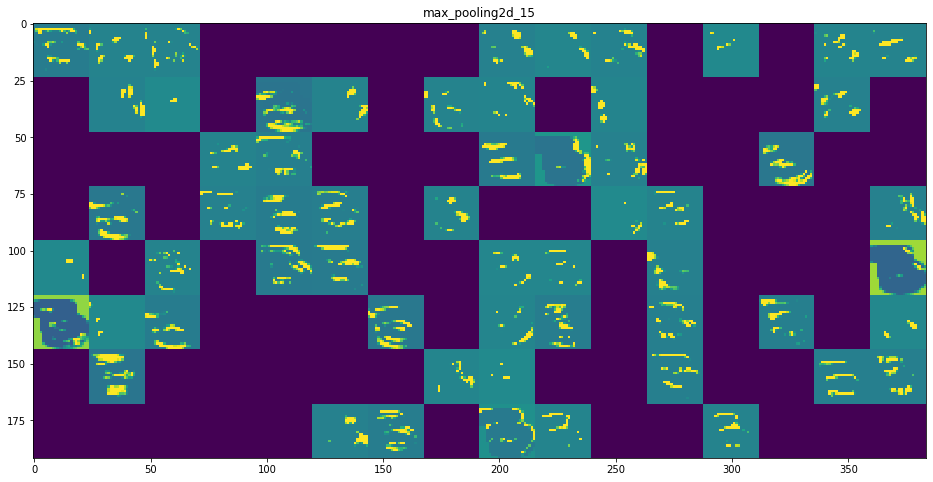

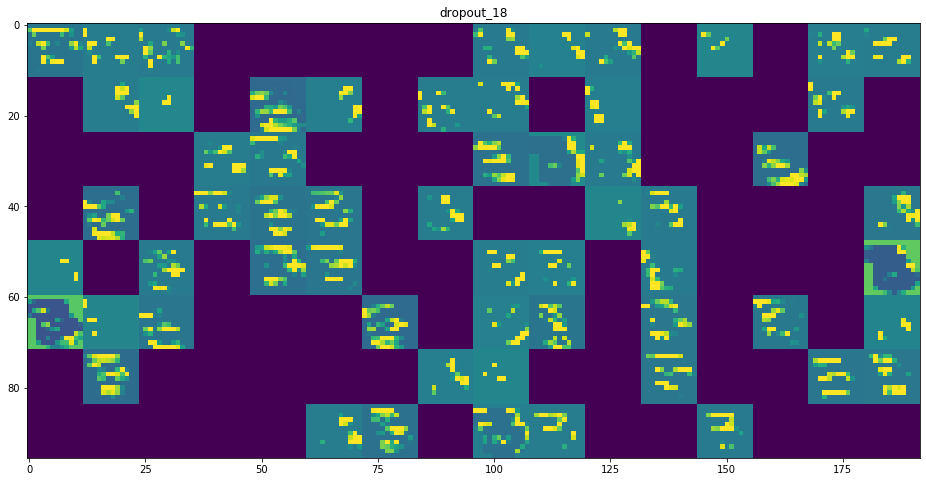

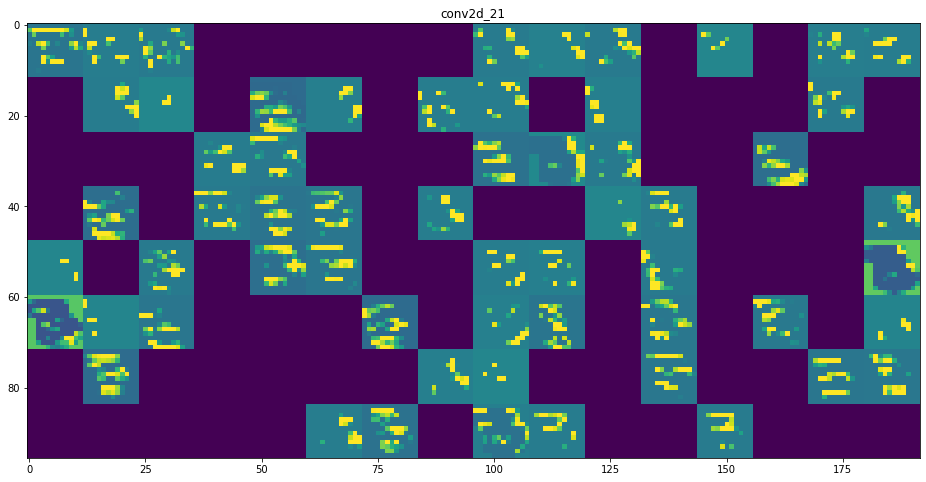

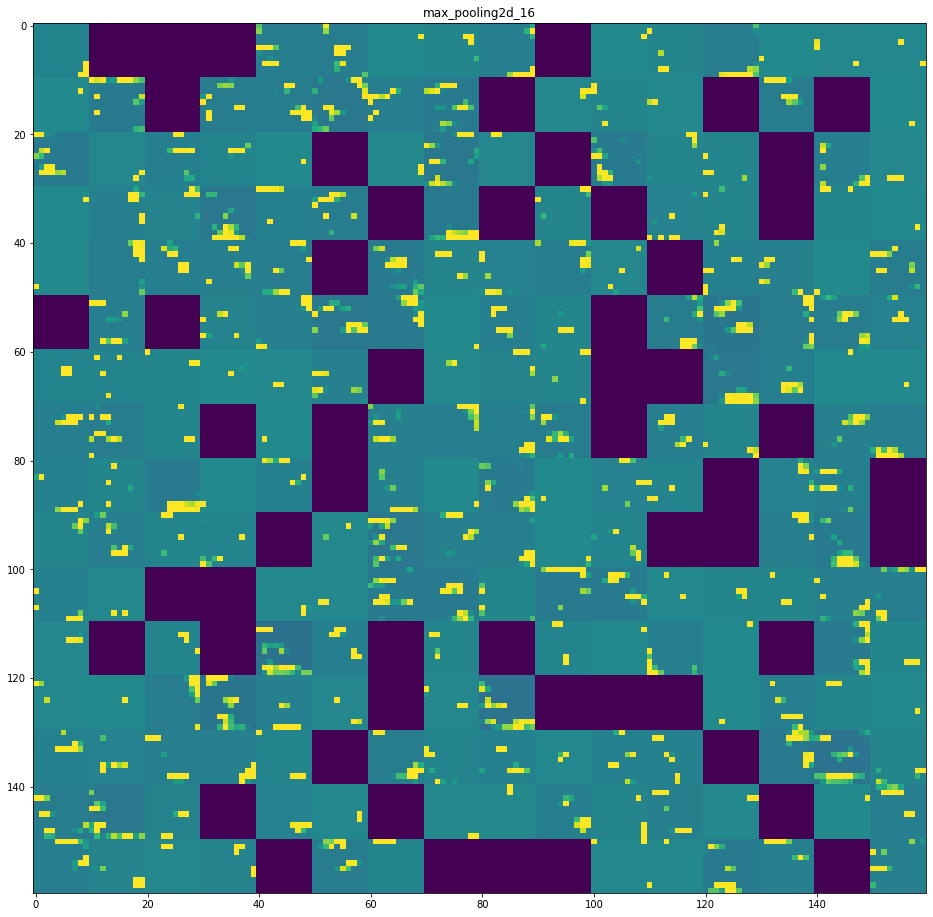

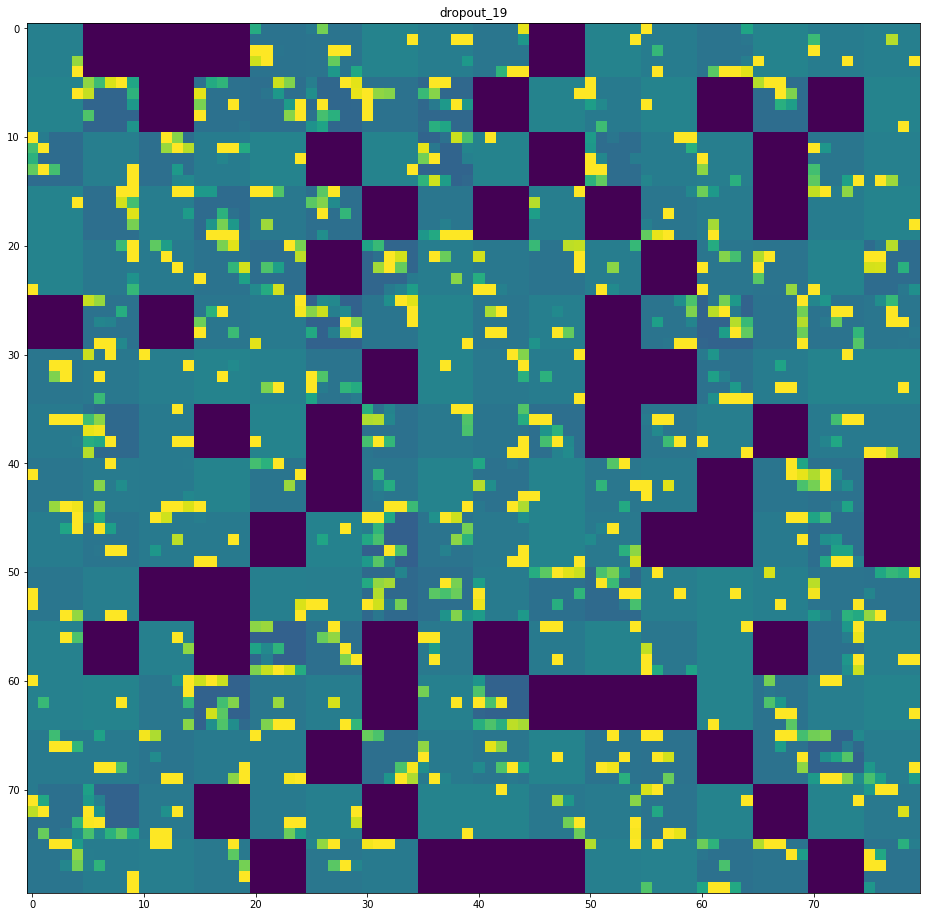

In [95]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')